<a href="https://colab.research.google.com/github/Rdisrael/progs-and-AI/blob/main/Atividade_pratica_Controle_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 9.7 MB/s eta 0:00:00


A
Esse é o B:
                4.375
-------------------------------------
5.079e-05 s^2 + 0.01185 s + 0.0001995

Esse é o feedback:
               4.375
-----------------------------------
5.079e-05 s^2 + 0.01185 s + 0.03813

Esse é o C: 
0.005
-----
  s

Função de transferência em Malha aberta: 
                0.2625
---------------------------------------
5.079e-05 s^3 + 0.01185 s^2 + 0.03813 s

D

          0.06563 s + 0.2625
---------------------------------------
5.079e-05 s^3 + 0.01185 s^2 + 0.03813 s



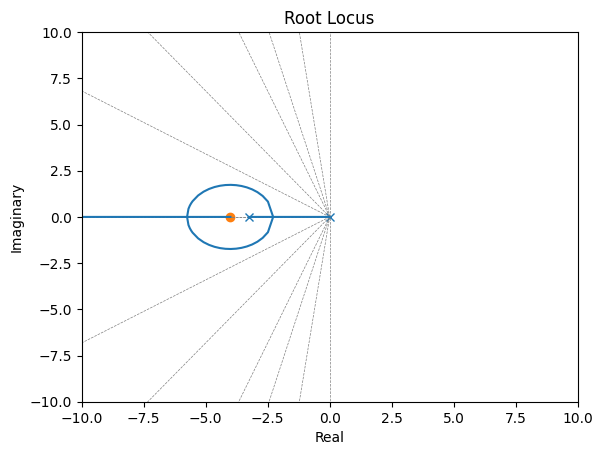

In [ ]:
import control as ctl
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as ml

#A)Obtenha função de transferência em malha aberta
#dados do exercicio
Ka = 12
L = 0.006
R = 1.4
Kce = 0.00867
n = 200
km = 4.375
JC = 1
DC = 0.5
jm = 0.00844
Dm = 0.00013
J = jm+(JC/n**2)
D = Dm+(DC/n**2)
print("A")
#funções do diagrama de blocos
B = ctl.tf([km], [L, R]) * ctl.tf([1], [J, D])
print(f"Esse é o B:{B}")
BD = ctl.feedback(B, Kce, sign = -1)
print(f"Esse é o feedback:{BD}")
C = ctl.tf([1/n], [1,0])
print(f"Esse é o C: {C}")
BCD = BD * C
FTMA = Ka * BCD
print(f"Função de transferência em Malha aberta: {FTMA}")

#LGR
print("D")
func = ctl.tf([1/4,1],[1]) * FTMA
plt.figure(1)
ctl.root_locus(func)
plt.ylim([-10,10]);plt.xlim([-10,10])
print(func)




E
FTMA 
          0.06563 s + 0.2625
--------------------------------------
5.79e-05 s^3 + 0.01185 s^2 + 0.03813 s
 Polos [-201.39324566+0.j   -3.26996678+0.j    0.        +0.j] Zeros [-4.+0.j]


<Figure size 640x480 with 0 Axes>

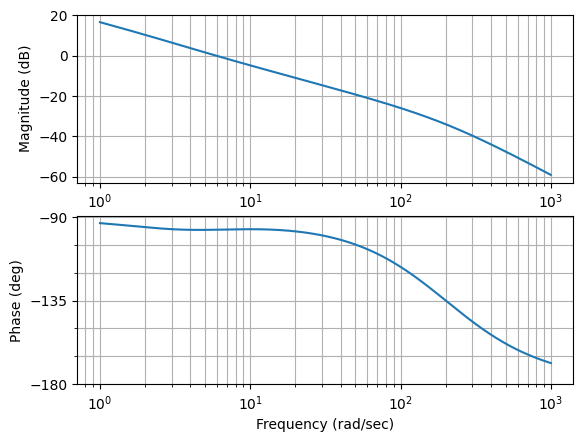

<Figure size 640x480 with 0 Axes>

In [ ]:
#Bode
print("E")
num= np.array([0.065625,0.2625])
den= np.array([5.79*10**-5,0.01185,0.03813,0])
G=ml.tf(num,den)
P=ml.pole(G)
Z=ml.zero(G)
print("FTMA",G,"Polos",P,"Zeros",Z)
mag,phase,w=ml.bode(G)
plt.figure(2)

F
FTMF 
          0.06563 s + 0.2625
--------------------------------------
5.79e-05 s^3 + 0.01185 s^2 + 0.03813 s

{'RiseTime': nan, 'SettlingTime': nan, 'SettlingMin': nan, 'SettlingMax': nan, 'Overshoot': nan, 'Undershoot': nan, 'Peak': inf, 'PeakTime': inf, 'SteadyStateValue': nan}


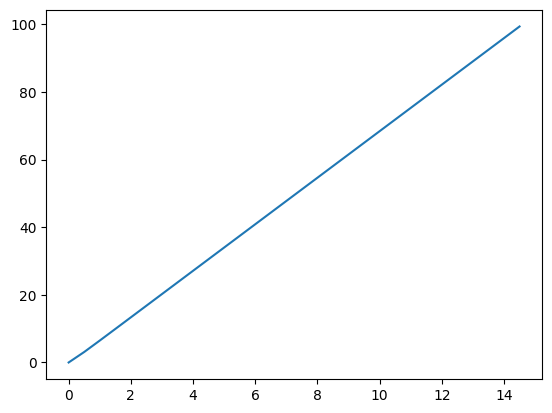

In [ ]:
#degrau
print("F")
num1= np.array([0.065625,0.2625])
den1= np.array([5.79*10**-5,0.01185,0.03813,0])
sys=ctl.TransferFunction(num1,den1)
print("FTMA",sys)
time_simulation=np.arange(0,15,0.5, dtype =float)
[xout,yout]=ctl.step_response(sys, time_simulation)
information=ctl.step_info(sys)
print(information)
plt.figure()
plt.plot(xout,yout)
plt.show()
